<a href="https://colab.research.google.com/github/Gramani-Kumar/DL-Demo/blob/master/Visualizing_through_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Visualizing through CNN
 - Go through filters and see what it is learning. it will be very very interesting. :)

   

1.   Go through loading custom datasets.
2.   Evaluate the prediction.
3.   Visualize whats going in inside Deep Nueral Network when image classificaton.




In [40]:
#Package to visualize and load datasets.

import torch                                 #Torch. 
import torchvision                           #Image supporting library. 
import torchvision.datasets as datasets      #Collection of datasets already collected by research group for us :)
import torchvision.models as models          #Model zoo .. yes. all the famous models will be available here.
import torchvision.transforms as transforms  #To do image process on the fly when loading.
import torch.nn as nn                        #Neural Network

In [2]:
#Plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Loading custome data
# 1. Step prepare your custom data + with label.
# 2. Zip and upload here.
# 3. no matter what size would be.
# 4. Label files : download imagenet label file
!ls

data.zip  sample_data


In [4]:
!tar -zxvf data.zip

data/
data/imageLabel.txt
data/images/
data/images/cup1.jpeg
data/images/trunk10.jpeg
data/images/cup8.jpeg
data/images/trunk3.jpeg
data/images/trunk2.jpeg
data/images/cup9.jpeg
data/images/trunk4.jpeg
data/images/cup5.jpeg
data/images/trunk6.jpeg
data/images/trunk7.jpeg
data/images/cup6.jpeg
data/images/cup10.jpeg
data/images/cup4.jpeg
data/images/trunk9.jpeg
data/images/cup3.jpeg
data/images/trunk5.jpeg
data/images/trunks8.jpeg
data/images/cup2.jpeg
data/images/cup7.jpeg
data/images/trunks1.jpeg


In [5]:
#Read the label text file for classfication

with open("data/imageLabel.txt") as fd:
  classes = eval(fd.read())

In [6]:
print(classes) #Check the classes

{0: 'tench, Tinca tinca', 1: 'goldfish, Carassius auratus', 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 3: 'tiger shark, Galeocerdo cuvieri', 4: 'hammerhead, hammerhead shark', 5: 'electric ray, crampfish, numbfish, torpedo', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich, Struthio camelus', 10: 'brambling, Fringilla montifringilla', 11: 'goldfinch, Carduelis carduelis', 12: 'house finch, linnet, Carpodacus mexicanus', 13: 'junco, snowbird', 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 15: 'robin, American robin, Turdus migratorius', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water ouzel, dipper', 21: 'kite', 22: 'bald eagle, American eagle, Haliaeetus leucocephalus', 23: 'vulture', 24: 'great grey owl, great gray owl, Strix nebulosa', 25: 'European fire salamander, Salamandra salamandra', 26: 'common newt, Triturus vulgaris', 27: 'eft', 28: 'spotted salamander, Ambystoma maculatum', 29: 'axolotl, mu

In [7]:
#Load our data 
#  we need to create transform object to apply later.
myTransform = transforms.Compose([transforms.Resize((224,224)),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

#Mean and Std.Dev set to = 0.5 and 0.5 for each channel.
#Note : if you are taking image from ImageNet use the following value (0.485, 0.456, 0.406) (0.229,0.224,0.225)


In [8]:
!ls data/images

cup10.jpeg  cup4.jpeg  cup8.jpeg     trunk3.jpeg  trunk7.jpeg
cup1.jpeg   cup5.jpeg  cup9.jpeg     trunk4.jpeg  trunk9.jpeg
cup2.jpeg   cup6.jpeg  trunk10.jpeg  trunk5.jpeg  trunks1.jpeg
cup3.jpeg   cup7.jpeg  trunk2.jpeg   trunk6.jpeg  trunks8.jpeg


In [9]:
#Create dataset and Apply transformer.

dataset = torchvision.datasets.ImageFolder(root="./data", transform=myTransform)


In [10]:
#create dataloader for the dataset
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])


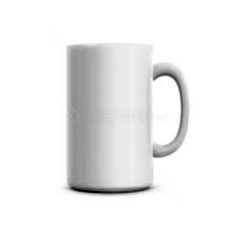

0


In [11]:
#Lets see what we add into our data after transformation.
iData = iter(dataloader).next()
print(iData[0][0].shape)  #3,224,224   modify this to 224,224,3 so that you can plot
plt.axis("off")
plt.show(plt.imshow(iData[0][0].numpy().transpose(1, 2, 0)))
#plt.title(iData[1].item())
print(iData[1].item())

In [12]:
#Lets load Model
vgg = models.vgg16(pretrained=True)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


In [13]:
#set to evalution mode which means we can evalute unknown data directly
vgg.eval() 

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [14]:
out = vgg(iData[0])
#print(torch.max(out.data),1)

In [15]:
#check what is the output size.
out.shape

torch.Size([1, 1000])

In [25]:
#Find the max index
print(out.max(dim=1))


torch.return_types.max(
values=tensor([13.5873], grad_fn=<MaxBackward0>),
indices=tensor([504]))


In [27]:
#find max probability
value,indices = torch.max(out,1) 

print("The image classified to imagenet class of :: %s" % classes[indices.item()]) 

#Well done. we are able to find the image with just help of pretrained weights.

The image classified to imagenet class of :: coffee mug


#How to use Max

In [4]:
tmp = torch.rand(3,5)
print(tmp)


tensor([[0.5051, 0.9168, 0.5801, 0.5916, 0.4875],
        [0.6820, 0.8297, 0.7305, 0.5788, 0.1281],
        [0.3927, 0.0021, 0.3736, 0.8659, 0.0687]])


In [5]:
print(tmp.max(dim=0))

torch.return_types.max(
values=tensor([0.6820, 0.9168, 0.7305, 0.8659, 0.4875]),
indices=tensor([1, 0, 1, 2, 0]))


In [6]:
print(tmp.max(dim=1
              ))

torch.return_types.max(
values=tensor([0.9168, 0.8297, 0.8659]),
indices=tensor([1, 1, 3]))


#Visulalization
 -Lets see what is inside the filters and what its learning

In [30]:
def plot_filters_in_multi_channel(weight_tensor) :  
  #Conv2d(3, 64, kernel_size=(3, 3)) , 3 channel to 64 channel with image size 3x3
    # assume this as 64 images of 3 channel depth.
  num_filter = weight_tensor.shape[0]  #Kernel

  #Plot matrics
  num_cols = 12
  num_rows = num_filter

  fig = plt.figure(figsize= (num_cols, num_rows))

  for i in range(num_filter):
    ax1 = fig.add_subplot(num_rows, num_cols, i + 1)

    npimg = np.array(weight_tensor[i].numpy(), np.float32)
    npimg = (npimg - np.mean(npimg)) / np.std(npimg)

    npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))  #De-normalization
    npimg = npimg.transpose((1, 2, 0))

    ax1.imshow(npimg)
    ax1.axis("off")
    ax1.set_title(str(i))
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])

  plt.tight_layout()
  plt.show()                      
 
  


In [36]:
def plot_weights(model, layer_num) :
  layer = model.features[layer_num]
  if isinstance(layer, nn.Conv2d):
    #Get the Weights on the layer
    weight_tensor = model.features[layer_num].weight.data
    #Plot it
    plot_filters_in_multi_channel(weight_tensor)
  else :
    print("Invalid input : We can plot only for Conv2d layer")


In [41]:
model = models.alexnet(pretrained=True)


In [34]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

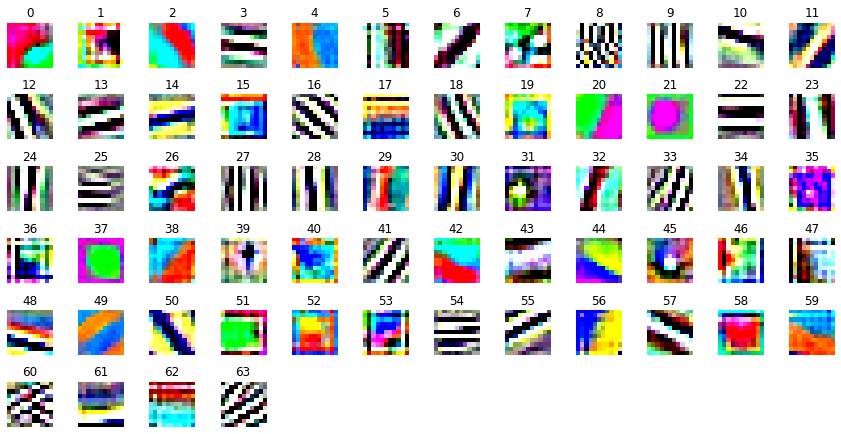

In [46]:
plot_weights(model, 0)  #Conv2d(3, 64, kernel_size=(11, 11) 

In [43]:
#Well done.

#TODO : Plot each filter currently 3x64 drawan ,, draw all 3 x 64 to see what each filter looks like
#TODO : Go deeper level.

#Power of computation "numpy < torch < torch + GPU"

In [ ]:
%%time
a = np.random.rand(10000, 10000)
b = np.random.rand(10000, 10000)
np.matmul(a, b)

CPU times: user 1min 55s, sys: 1.5 s, total: 1min 57s
Wall time: 1min


In [ ]:
%%time
x = torch.randn(10000, 10000)
y = torch.randn(10000, 10000)
torch.matmul(x, y)

CPU times: user 19.1 s, sys: 3.24 ms, total: 19.1 s
Wall time: 19.1 s


In [ ]:
%%time
l = torch.randn(10000, 10000)
m = torch.randn(10000, 10000)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
l = l.to(device)
m = m.to(device)


CPU times: user 5.28 s, sys: 1.15 s, total: 6.43 s
Wall time: 12.6 s


In [ ]:
%%time
l = torch.matmul(l, m)

CPU times: user 2 ms, sys: 1.81 ms, total: 3.81 ms
Wall time: 17.9 ms
